In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import sqlite3

Step 3: Download the data using request library

In [2]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

resp = requests.get(url)

html_data = resp.text

#Step 4: Parse the html data using beautiful_soup

In [3]:
result = BeautifulSoup(html_data,"html.parser")

In [4]:
# 1- Find all tables

tables = result.find_all("table")

In [5]:
# 2- find table with Tesla quarterly revenue

for index,table in enumerate(tables): #get quarterly revenue table
    if "Tesla Quarterly Revenue" in str(table):
        my_index = index

In [6]:
# 3- create the dataframe
# 4 - Iterate over the table rows to get the values and remove the $ and comma

df = pd.DataFrame(columns=["Date","Revenue"]) 

for row in tables[my_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col != "":
        fecha = col[0].text
        rev = col[1].text.replace("$","").replace(",","")
        df = df.append({"Date":fecha, "Revenue":rev}, ignore_index=True)



/tmp/ipykernel_1032/491212502.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date":fecha, "Revenue":rev}, ignore_index=True)
/tmp/ipykernel_1032/491212502.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date":fecha, "Revenue":rev}, ignore_index=True)
/tmp/ipykernel_1032/491212502.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date":fecha, "Revenue":rev}, ignore_index=True)
/tmp/ipykernel_1032/491212502.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date":fecha, "Revenue":rev}, ignore_index=True)
/tmp/ipykernel_1032/491212502.py:11: FutureWarning: 

In [7]:
df

,Date,Revenue
0,2022-03-31,18756
1,2021-12-31,17719
2,2021-09-30,13757
3,2021-06-30,11958
4,2021-03-31,10389
5,2020-12-31,10744
6,2020-09-30,8771
7,2020-06-30,6036
8,2020-03-31,5985
9,2019-12-31,7384


Step 5: Clean Rows

In [8]:
# Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column.

df.info() #There are no NaN values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     52 non-null     object
 1   Revenue  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [9]:
df = df[df['Revenue'] != ""] #Filter empty strings
df

,Date,Revenue
0,2022-03-31,18756
1,2021-12-31,17719
2,2021-09-30,13757
3,2021-06-30,11958
4,2021-03-31,10389
5,2020-12-31,10744
6,2020-09-30,8771
7,2020-06-30,6036
8,2020-03-31,5985
9,2019-12-31,7384


Step 6: Insert the data into sqlite3

In [10]:
# Insert the data into sqlite3 by converting the dataframe into a list of tuples

list_tuples = list(df.itertuples(index=False, name=None))
list_tuples

[('2022-03-31', '18756'),
 ('2021-12-31', '17719'),
 ('2021-09-30', '13757'),
 ('2021-06-30', '11958'),
 ('2021-03-31', '10389'),
 ('2020-12-31', '10744'),
 ('2020-09-30', '8771'),
 ('2020-06-30', '6036'),
 ('2020-03-31', '5985'),
 ('2019-12-31', '7384'),
 ('2019-09-30', '6303'),
 ('2019-06-30', '6350'),
 ('2019-03-31', '4541'),
 ('2018-12-31', '7226'),
 ('2018-09-30', '6824'),
 ('2018-06-30', '4002'),
 ('2018-03-31', '3409'),
 ('2017-12-31', '3288'),
 ('2017-09-30', '2985'),
 ('2017-06-30', '2790'),
 ('2017-03-31', '2696'),
 ('2016-12-31', '2285'),
 ('2016-09-30', '2298'),
 ('2016-06-30', '1270'),
 ('2016-03-31', '1147'),
 ('2015-12-31', '1214'),
 ('2015-09-30', '937'),
 ('2015-06-30', '955'),
 ('2015-03-31', '940'),
 ('2014-12-31', '957'),
 ('2014-09-30', '852'),
 ('2014-06-30', '769'),
 ('2014-03-31', '621'),
 ('2013-12-31', '615'),
 ('2013-09-30', '431'),
 ('2013-06-30', '405'),
 ('2013-03-31', '562'),
 ('2012-12-31', '306'),
 ('2012-09-30', '50'),
 ('2012-06-30', '27'),
 ('2012-03

Step 7: Connect to SQLite

In [11]:
conn = sqlite3.connect('Tesla.db')

Step 8: Let's create a table in our database to store our revenue values

In [12]:
c = conn.cursor()

Create table
c.execute('''CREATE TABLE revenue
             (Date, Revenue)''')

SyntaxError: invalid syntax (113898956.py, line 3)

In [ ]:
# Insert values

c.executemany('INSERT INTO revenue VALUES (?,?)', list_tuples)

In [ ]:
# Commit
conn.commit()

Step 9: Now retrieve the data from the database

In [ ]:
for row in c.execute('SELECT * FROM revenue'):
    print(row)

('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-31', '306')
('2012-09-30', '50')
('2012-06-30', '27')
('2012-03-31', '30')
('2011-12-31', '39')
('2011-09-30', '58')
('2011-06-30', '58')
('2011

Step 10: Finally create a plot to visualize the data

In [ ]:
# Convert to df

new_df = pd.read_sql_query("SELECT * FROM revenue", conn)
new_df

,Date,Revenue
0,2022-03-31,18756
1,2021-12-31,17719
2,2021-09-30,13757
3,2021-06-30,11958
4,2021-03-31,10389
5,2020-12-31,10744
6,2020-09-30,8771
7,2020-06-30,6036
8,2020-03-31,5985
9,2019-12-31,7384


In [ ]:
# Change data types

new_df['Date']=new_df['Date'].astype('datetime64')
new_df['Revenue']=pd.to_numeric(new_df['Revenue'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     51 non-null     datetime64[ns]
 1   Revenue  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 944.0 bytes


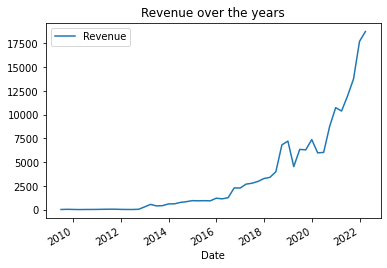

In [ ]:
# Plot revenue over the years

new_df.plot('Date' , 'Revenue')
plt.title("Revenue over the years")
plt.show()